# Eksempel: En ideell pendel

I dette kurset har vi sett hvordan vi kan bruke Eulers metode til å løse nokså generelle, skalare differensialligninger.
Vi har også sett på eksempler hvor vi har satt opp Eulers metode for andre ordens *lineære* differensialligninger, som vi vet at det er mulig å løse eksakt.
I praktiske problemstillinger har vi typisk koblede ligninger for *mange* ukjente, og disse systemene er så godt som aldri lineære!

Her skal vi ta for oss en litt mer komplisert andreordens differensialligning, hvor vi faktisk trenger numeriske metoder for å løse den, i motsetning til de lineære ligningene vi har sett på tidligere.

Dette er også en god anledning til å se på *faseportretter* for slike andreordens differensialligninger: dette er en mer generell versjon av retningsfeltet som vi så på tidligere.
I tillegg gir faseportrettene oss en fin måte å visualisere en annen fallgruve knyttet til stabilitet for Eulers metode, nå i to dimensjoner.

Merk at dette er et ganske omstendelig eksempel, som på noen punkter går litt utenfor hovedtemaene i pensum.
På den annen side gir dette en smakebit på hva man kan bruke numeriske metoder til, og hvordan man med noen små justeringer av de teknikkene dere har lært kan implementere andre varianter av de numeriske metodene som kan være mer passende for et problem.

### Oppsett

Vi ser på en *idealisert*, eller ideell, pendel: dette er en punktmasse med masse $m$ opphengt i en masseløs stang med lengde $l$.
Oppførselen til pendelen kan beskrives av hvordan én enkelt størrelse varierer over tid, nemlig vinkelutslaget $\theta$.
Figuren nedenunder viser oppsettet.

<img src="3_pendel.png" style="width: 25%">

Her betyr $\theta = 0$ at pendelen henger rett ned, imens $\theta = \pm\pi$ betyr at pendelen står akkurat på balansepunktet hvor den peker rett opp.
Videre vil $\theta = 2\pi$ bety at pendelen har rotert én hel runde i positiv retning (mot klokka) og igjen henger rett ned.

### Differensialligningen

Nå ønsker vi å beskrive hvordan pendelen oppfører seg dersom vi slipper den fra en gitt startposisjon.

Vi antar at det kun er to krefter som virker på punktmassen.
Den ene er tyngdekraften som virker rett nedover med størrelse gitt av $m g$, hvor $g$ er tyngdeakselerasjonen hvor pendelen befinner seg.
Den andre er kraften fra stanga og opphenget som sørger for at punktmassen ikke faller ned.
Vi antar altså at det ikke er noen friksjon inne i bildet.
Da kan vi fra Newtons andre lov utlede differensialligningen

$$ \theta'' + \frac{g}{l}\sin(\theta) = 0, \tag{3.13} $$

hvor $\theta = \theta(t)$ er vinkelutslaget ved tid $t$.
Dermed er de deriverte $\theta'$ og $\theta''$ henholdsvis vinkelhastigheten og vinkelakselerasjonen til utslaget.

Vi ser at dette er en andreordens differensialligning, så for det tilhørende startverdiproblemet til (3.13) er vi nødt til å spesifisere både startvinkelen $\theta(0) = \theta_0$ og start-vinkelhastigheten $\theta'(0) = \theta'_0$.
For eksempel, dersom vi slipper pendelen fra ro i en vannrett posisjon til høyre vil de korresponderende startverdiene være $\theta_0 = \frac{\pi}{2}$ og $\theta_0' = 0$.

Fra ligning (3.13) ser vi at massen $m$ faktisk ikke spiller noen rolle! Dette er fordi vi ignorerer friksjon; i virkeligheten ville en slik pendel til slutt falle til ro på grunn av friksjon i opphenget og luftmotstand. Dersom vi hadde tatt hensyn til disse kreftene hadde også massen dukket opp i den tilhørende ligningen.

### En forenklet (linearisert) ligning
Ligning (3.13) er ikke bare en andreordens differensialligning, den er også *ikkelineær*: den ukjente størrelsen $\theta$ dukker opp som argument i sinusfunksjonen.
Dermed kan den ikke løses eksakt med metodene som man lærer i grunnleggende kurs i differensialligninger.
Det er derimot ikke vanskelig å tilnærme løsningen av (3.13) med Eulers metode, og en av hovedgrunnene for å lære numeriske metoder er jo nettopp å kunne tilnærmet løse ligninger som ikke kan løses eksakt.

Noen ganger "jukser" man litt og forenkler ligninger til noe som vi er i stand til å løse, og i noen tilfeller kan dette gi tilfredsstillende resultater.
For eksempel, for små utslag $\theta$ har vi at $\sin(\theta) \approx \theta$, sånn at en tilnærming av (3.13) for små vinkelutslag er

$$ \theta'' + \omega^2 \theta = 0, \tag{3.14} $$

hvor vi har introdusert $\omega = \sqrt{g/l}$ siden både $g$ og $l$ er positive størrelser.
Dette er derimot en lineær annenordens differensialligning, og den eksakte løsningen vil vil være en lineærkombinasjon av de trigonometriske funksjonene $\sin(\omega t)$ og $\cos(\omega t)$, nemlig

$$ \theta(t) = \theta_0 \cos(\omega t) -\frac{\theta_0'}{\omega}\sin(\omega t). $$

Her ser vi at størrelsen $\omega$ dukker opp som en svingefrekvens i løsningen; dersom vi øker lengden $l$ til pendelen vil $\omega$ reduseres, og vi forventer at pendelen svinger saktere.

Slike lineariseringer er ikke uvanlige, spesielt som

### Omskrivning til førsteordens systemer
For å løse ligning (3.13) med Eulers metode ønsker vi vi som vanlig å ta utgangspunkt i det korresponderende førsteordens systemet av differensialligninger.
Vi introduserer den nye variabelen $\phi = \theta'$, og får systemet

$$ \begin{bmatrix} \theta' \\ \phi' \end{bmatrix} = \begin{bmatrix} \phi \\ -\omega^2 \sin(\theta) \end{bmatrix}. $$

Vi kan selvfølgelig også gjøre det samme med den forenklede ligningen (3.14). Siden denne er lineær kan høyresiden i det tilhørende systemet skrives som produktet av en matrise med vektoren av ukjente, 
på følgende vis

$$ \begin{bmatrix} \theta' \\ \phi' \end{bmatrix} = \begin{bmatrix} \phi \\ -\omega^2 \theta \end{bmatrix} = \begin{bmatrix} 0 & 1 \\ -\omega^2 & 0 \end{bmatrix} \begin{bmatrix} \theta \\ \phi \end{bmatrix}. $$

Før vi bruker Eulers metode til å løse (3.13) og (3.14), la oss se litt mer på egenskapene til disse ligningene.

### Faseportretter, vinkelutslag og vinkelhastigheter
Dersom vi for en av ligningene plotter $\theta$ og $\theta'$ (eller $\phi$) mot hverandre får vi et såkalt *faseportrett*.
En gitt løsning av ligningen vil være en kurve i dette planet hvor den frie variablen $t$ angir posisjonen langs kurven.
Dette kalles en *løsningskurve*.

<img src="3_faseplott.png" style="width: 80%">

Til venstre ovenfor har vi faseportrettet for den opprinnelige idealiserte pendelen (3.13), og til høyre har vi faseportrettet for den forenklede ligningen (3.14), begge for $\omega = 1$.
Vi legger merke til at for små vinkelutslag, det vil si $\theta$ nær $0$, er portrettene nokså like.
Dette er rimelig, tilnærmingen $\sin(\theta) \approx \theta$ kun er god for små verdier.
For større vinkelutslag er portrettene derimot veldig forskjellige.

De ulike kurvene tilsvarer ulike løsninger av ligningene, man kan tenke seg at man har én kurve for hvert sett med startverdier.
Et sett med startverdier $\theta_0$ og $\theta_0'$ spesifiserer et punkt i planet, og løsningen av ligningen vil følge kurven som går gjennom dette punktet.
Her ser vi at startverdier som gir punkter nær origo vil gi temmelig lik oppførsel for begge ligningene.

>**Merk:** Umiddelbart er det kanskje ikke så lett å se sammenhengen mellom faseportrettet og pendeloppsettet, så for å illustrere dette skal vi ta for oss en av løsningskurvene i høyre faseportrett.
>
>La oss se på kurven som går gjennom $(\pi/4,0)$, dette er en sirkel med radius $\pi/4$ med en mulig parametrisering gitt av
>
>$$ \theta(t) = -\frac{\pi}{4}\cos(t) $$
Dette svarer til en løsning av (3.14) hvor pendelen starter fra ro med utslag $\theta_0 = -\pi/4$.
>
><img src="3_pendel_illust.gif" style="width: 75%">
>
>Her har vi for enkelhets skyld satt lengden av pendelen til $1$; de nøyaktige tallverdiene vil uansett avhenge av hvilke enheter vi måler i. Dersom opphengspunktet til pendelen er i origo, så vil koordinatene til pendelloddet da være
>$$ x = \sin(\theta), \qquad y = -\cos(\theta). $$
Animasjonen ovenfor viser hvordan pendelen svinger når vi beveger oss langs løsningskurven i faseportrettet.

Når pendelen har sine største utslag må vinkelhastigheten $\theta'$ være null: idet den har sitt største positive vinkelutslag må $\theta'$ endre fortegn fra positivt til negativt, og omvendt for det mest negative vinkelutslaget.
Legg merke til at alle de lukkede kurvene i faseportrettene har *to* punkter hvor $\theta' = 0$: ett der pendelen har sitt største positive vinkelutslag (i høyre retning), og ett der pendelen har sitt mest negative vinkelutslag.

På den annen side ser vi at kurvene som ikke er lukkede i portrettet til venstre aldri tar $\theta'$ aldri verdien $0$, den er alltid enten positiv eller negativ.
Det vil si at pendelen roterer så fort, enten med eller mot klokka, at den aldri snur!

>**Merk:** Ser du nå fra høyre faseportrett hvorfor ligningen (3.14) med er en urimelig modell for pendelen når vinkelutslagene $\theta$ blir for store?
Sirklene med radius større enn $\pi$ svarer til at pendelen svinger over "toppen" ($\theta=\pi$) og ned på motsatt side, før den når sitt største utslag hvor den snur og svinger tilbake igjen. Dette er oppførsel som ikke går an med mindre noen utenfor systemet gir pendelen en dytt slik at den snur, men det var ikke blant antakelsene våre!

### Energi og løsningskurver
Fra diskusjonen ovenfor ser vi at løsningene av (3.13) kan ha to ganske ulike oppførsler. Den ene er den typiske oppførselen til en pendel, massen svinger frem og tilbake mellom sine maksimale utslag.
Den andre er at massen roterer rundt opphengspunktet til pendelen.
Hvilken oppførsel man får er bestemt av energien til løsningen, nærmere bestemt kampen mellom *kinetisk* og *potensiell* energi.

Man kan vise at for løsninger av (3.13) er den følgende størrelsen bevart,

$$ \frac12 (\theta')^2 + \omega^2(1-\cos(\theta)). $$

Det vil si, for enhver tid $t$ er verdien av dette uttrykket den samme som ved starttidspunktet. Dette er energien til det mekaniske systemet som den idealiserte pendelen utgjør.
Det første leddet er den *kinetiske energien* til systemet. Dette er bidraget til energien grunnet bevegelsen til pendelen: null vinkelhastighet $\theta'=0$ betyr null kinetisk energi.

Det andre leddet er den *potensielle energien* til systemet.
Dette bidraget kommer av at så lenge pendelen ikke henger rett ned vil vi kunne slippe den og den vil begynne å svinge: deler av den potensielle energien går over i bevegelsesenergi (kinetisk energi).

Når $\theta=0$ (eller $\theta = \pm 2\pi$, $\pm 4\pi,\dots$) er pendelen på sitt laveste nivå og har minimal potensiell energi.
På den annen side, når $\theta = \pm \pi$ (eller $\theta = \pm 3\pi$, $\pm 5\pi,\dots$) er pendelen på sitt høyeste nivå og har maksimal potensiell energi.

Den totale energien er summen av disse bidragene, og dersom den totale energien er større enn den maksimale potensielle energien vil pendelen rotere helt rundt opphengspunktet sitt.


Uten friksjon i systemet er det intet tap av energi, og når pendelen beveger seg vil mengden kinetisk og potensiell energi variere, men summen av disse er alltid den samme.
Dermed tilsvarer også hver løsningskurve til et bestemt konstant energinivå, som vi har illustrert i faseportrettene med et fargepalett.
I disse figurene svarer blålige farger til lavere energinivåer og rødlige farger til høyere energinivåer.

Den lineariserte ligningen (3.14) har også en tilhørende bevart energi, gitt av
$$\frac12(\theta')^2 + \frac12 \omega^2 \theta^2. $$

Merk at for et gitt energinivå $E > 0$ tilsvarer energien til den forenklede ligningen (3.14) med $\omega=1$ en sirkel i $\theta$-$\theta'$-planet med radius $\sqrt{2E}$; da har vi nemlig

$$ \theta^2 + (\theta')^2 = 2E. $$

Derfor er alle løsningskurvene i høyre faseportrett lukkede sirkler.

## Eulers metode(r)

Nå er det på tide å huske hva det var vi ønsket å gjøre her, som var å løse (3.13) numerisk.

La $h > 0$ være skrittlengden og definer $t_n = n h$.
Videre lar vi $\theta_n$ være tilnærmingen av $\theta(t_n)$, og tilsvarende er $\phi_n$ tilnærmingen av $\phi(t_n) = \theta'(t_n)$.
Da finner vi at Eulers metode for dette systemet blir

$$ \begin{aligned} \theta_{n+1} &= \theta_n + h \phi_n, \\ \phi_{n+1} &= \phi_n - h \omega^2 \sin(\theta_n) . \end{aligned} \tag{3.15} $$

### Et startverdiproblem
Til å begynne med, la oss for et gitt startverdiproblem sammenligne Eulers metode for (3.13) med den eksakte løsningen gitt av tilnærmingen (3.14).

La oss velge $\omega = 1$, og se på en pendel som blir sluppet fra ro med startvinkelen $\theta(0) = \theta_0 = -\pi/4$. Da er altså start-vinkelhastigheten $\theta'(0) = \theta'_0 = 0$.

Løsningen av den forenklede ligningen (3.14) er da $ \theta(t) = -(\pi/4)\cos(t) $.

Vi ser på tre perioder for det lineariserte systemet, altså tidsintervallet $[0,T]$ med $T = 6\pi$ og $N=120$ steg slik at skrittlengden er $h = \pi/20$.

>**Merk:** Her kan man spørre seg om denne vinkelen $\theta_0$ er liten nok til at forenklingen (3.14) er rimelig.
Du kan jo selv prøve å redusere $h$ og se om løsningene blir likere.

Text(0.5, 1.0, "Vinkelhastighet $\\theta'$")

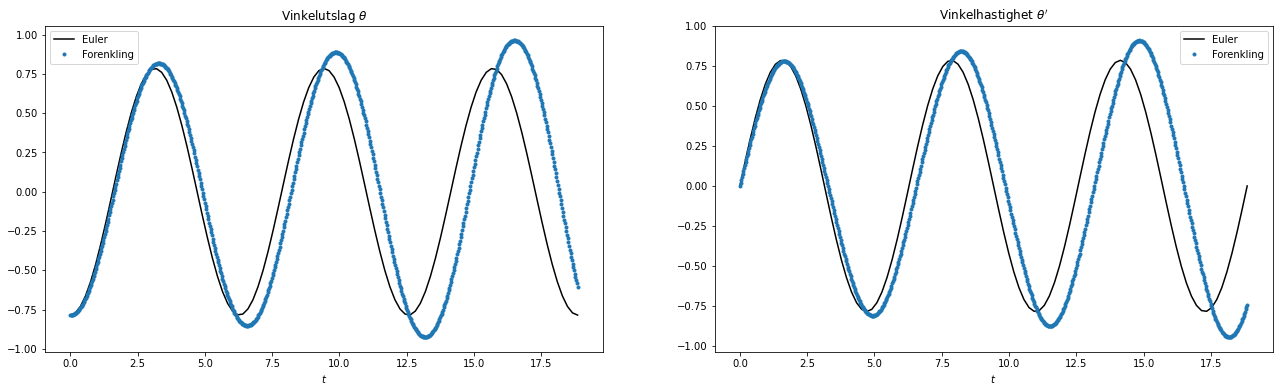

In [367]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

omega = 1 # omega
theta0 = -np.pi/4 # startvinkel
phi0 = 0 #start-vinkelhastighet

T = 6*np.pi # slutt-tidspunkt
N = 6*120 # antall steg med Euler
h = T/N # skrittlengde
tn = np.linspace(0,T,N+1)

def Y(t): # eksakt løsning av forenklet ligning
    return theta0*np.cos(omega*t) + (phi0/omega)*np.sin(omega*t)

def dY(t): # den deriverte av funksjonen ovenfor
    return -omega*theta0*np.sin(omega*t) + phi0*np.cos(omega*t)

Xn = np.zeros([N+1,2]) # liste med verdier for Eulers metode
Xn[0,0] = theta0
Xn[0,1] = phi0

for k in range(0,N): # N steg med Eulers metode for opphavelig ligning
    Xn[k+1,0] = Xn[k,0] + h*Xn[k,1]
    Xn[k+1,1] = Xn[k,1] - h*(omega**2)*np.sin(Xn[k,0])

tm = np.linspace(0,T,101)

fig1, (ax11,ax12) = plt.subplots(1,2,figsize=(22,6))

ax11.plot(tm,Y(tm),'k')
ax11.plot(tn, Xn[:,0],'.')
ax11.set_xlabel(r'$t$')
ax11.legend(['Euler','Forenkling'])
ax11.set_title(r'Vinkelutslag $\theta$')

ax12.plot(tm,dY(tm),'k')
ax12.plot(tn,Xn[:,1],'.')
ax12.set_xlabel(r'$t$')
ax12.legend(['Euler','Forenkling'])
ax12.set_title(r"Vinkelhastighet $\theta'$")

Vi ser her at vi har periodisk oppførsel for både tilnærmingen gitt av Eulers metode, og (selvfølgelig) for sinusbevegelsen til det lineariserte systemet.
Dessuten indikerer tilnærmingen vi får med Eulers metode at perioden til løsningen av den opphavelige ligningen (3.13) er lenger enn for løsningene av det lineariserte systemet.

Apropos energi, vi kan legge merke til at utslagene for tilnærmingen med Eulers metode blir gradivis litt større.
Dette er en bieffekt av Eulers metode: den eksakte løsingen skal ha like store utslag hver gang, siden den skal følge en av de lukkede kurvene i faseportrettet.
Man kan redusere denne økningen ved å velge en mindre steglengde $h$, men den vil alltid være der: på denne måten legger Eulers metode til energi som ikke er der.

Én idé kan være å bruke noe annet enn Eulers metode til å approksimere løsningen av systemet.
En annen metode som minner veldig om den vi har lært er *implisitt Eulers metode*, som for et system kan uttrykkes som

$$ \boldsymbol{x}_{n+1} = \boldsymbol{x}_n + h \boldsymbol{f}(\boldsymbol{x}_{n+1}). $$

Denne kalles implisitt fordi vi ikke direkte kan lese av hva neste iterat $\boldsymbol{x}_{n+1}$ er, dette er *implisitt* gitt av ligningen ovenfor.

For (3.13) blir da det tilhørende ligningssystemet

$$ \begin{aligned} \theta_{n+1} &= \theta_n + h \phi_{n+1}, \\ \phi_{n+1} &= \phi_n - h \omega^2 \sin(\theta_{n+1}). \end{aligned} \tag{3.16} $$

Merk at siden høyresiden ikke er lineær må vi i hvert steg bruke en numerisk metode, for eksempel fikspunktiterasjon eller Newtons metode, for å finne en approksimasjon av $\theta_{n+1}$ og $\phi_{n+1}$.

For å skille Eulers metode fra metoden ovenfor, blir metoden vi har lært ofte kalt *eksplisitt Eulers metode*; neste iterat er eksplisitt gitt.

>**Merk:** For den skalare modelligningen for stive ligninger, som vi så på i forbindelse med stabilitet for Eulers metode, vil implisitt Eulers metode alltid gi tilnærminger som er stabile: de avtar når parameteren $\lambda$ er negativ, uavhengig av skrittlengden $h$.

### Det lineariserte problemet
For det forenklede problemet (3.14) er det tilhørende ligningssystemet lineært, og det er mulig å finne eksplisitte uttrykk for tilnærmingene $\theta_{n+1}$ og $\phi_{n+1}$ gitt av implisitt Eulers metode.
La oss derfor sammenligne de to numeriske metodene for dette problemet, hvor vi som sagt også har den eksplisitte løsningen.

Vi ser på samme startverdier som ovenfor, $\theta_0 = -\pi/4$ og $\theta_0' = 0$.
Denne gangen går vi over to perioder, $T = 4\pi$, og for å få samme skrittlengde $h=\pi/20$ gjer vi $N=80$ steg.

I figurene har vi i tillegg en tredje metode som vi kommer tilbake til.

<img src="3_pendel_lincomp.png" style="width: 100%">
Vi ser at, som for tilfellet ovenfor, (eksplisitt) Eulers metode tilfører energi slik at utslagene blir større og større.
På den annen side, implisitt Eulers metode demper svingningene over tid.
Den tredje metoden, derimot, ligger svært nær den eksakte løsningen.
Som en ekstra illustrasjon kan vi se hvordan pendelen oppfører seg for tilnærmingene gitt av de tre metodene.

<img src="3_pendel_lincomp.gif" style="width: 100%">

#### Energibevarende numeriske metoder 
Denne typen tilførsel av energi vil fort gi veldig store avvik når man simulerer systemer over lang tid.
Bare se for deg en simulering av planetbanene rundt sola hvor den numeriske metoden tilfører så mye energi at jorda til slutt forlater solsystemet!
Eventuelt at den numeriske metoden fjerner nok energi til at jorda faller inn i sola!

For å bøte på denne oppførselen kan man alltids bruke kortere skrittlengder i den numeriske metoden, men dette vil kreve mye regnekraft over tid.
Nettopp på grunn av slike situasjoner har det blitt lagt inn mye innsats i å utvikle numeriske metoder som også bevarer viktige fysiske størrelser for systemene man simulerer, som for eksempel energi.

Forunderlig nok vil en liten endring i Eulers metode (3.15) gi approksimasjoner som oppfører seg langt bedre. 

$$ \begin{align*} \phi_{n+1} &= \phi_n - h \omega^2 \sin(\theta_n), \\ \theta_{n+1} &= \theta_n + h \phi_{n+1}. \tag{3.17} \end{align*} $$

Her beregner vi neste approksimasjon $\phi_{n+1}$ av $\phi = \theta'$ på samme måte som før, men så bruker vi i stedet denne verdien $\phi_{n+1}$ til å beregne $\theta_{n+1}$, heller enn å bruke $\phi_n$.

Dette kalles *semiimplisitt Eulers metode*, og dette er den tredje metoden vi har brukt på det lineære systemet ovenfor.
Denne metoden gir i teorien essensielt samme avvik fra den nøyaktige løsningen som eksplisitt Eulers metode, men på kjøpet får vi løsninger hvor energien er tilnærmet bevart.

### Tilbake til ideell pendel
La oss gå tilbake til å se på ligningen (3.13) for den idealiserte pendelen, denne gangen for startverdiene $\theta_0 = -\pi/2$ og $\theta_0' = 0$;
altså at vi holder pendelen horisontalt ut mot venstre og slipper den fra ro.
Her har vi ikke en eksakt løsning å sammenligne med, men vi kan sammenligne approksimasjonene vi får fra eksplisitt (3.15) og semiimplisitt Eulers metode (3.17).

Som i vårt første eksempel velger vi $T = 6\pi$ og $N=120$ slik at $h = \pi/20$.
Nedenfor har vi plottet vinkelutslagene over tid sammen med de tilhørende punktene i faseportrettet.

<img src="3_pendel_comp.png" style="width: 50%">

Vi ser at med denne skrittlengden vil den eksplisitte Eulers metode tilføre nok energi til at pendelen til slutt roterer helt rundt. 
Altså har den eksplisitte Eulers metode tatt oss fra en lukket bane til en bane med så mye energi at den ikke lenger er lukket.

Pendelens oppførsel for disse to approksimasjonene er illustrert i animasjonen under.

<img src="3_pendel_comp.gif" style="width: 100%">

>**Merk:**
Nå ser det kanskje ut som (eksplisitt) Eulers metode ikke er noe særlig og ikke vil gi en god tilnærming av de eksakte løsningene.
Da må vi understreke at du vil alltids kunne bruke Eulers metode til å få en så god tilnærming som du vil, du må bare velge skrittlengden $h$ liten nok.
Her vil vi bare påpeke at dersom du vil approksimere løsninger langt fram i tid kan dette kreve mye regnekraft, og det kan hende at det finnes mer effektive alternativer.
>
>*Prøv deg fram med å selv tilpasse koden ovenfor, gjerne med ulike startverdier og skrittlengder, eller kanskje til og med implementere (3.17).*